# INTRODUCTION:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TP4

In [47]:
df = pd.read_csv('diabetes.csv')

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].unique()

array([1, 0])

In [7]:
features = pd.DataFrame(df, columns = ['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age'])

In [8]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
target = pd.DataFrame(df, columns =['Outcome'])

In [10]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [11]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.neighbors import KNeighborsClassifier 
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, 
max_features=0.5)

Pour ce TP, nous allons utiliser comme classifieur de base un arbre de 
décision  DecisionTreeClassifier.  Ce  classifieur  nous  permet  d’établir  des  performances  de 
référence (c’est un ensemble à 1 modèle).

In [12]:
import numpy as np 
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier 
 
X, y = features, target 
clf = tree.DecisionTreeClassifier() 
clf.fit(X, y) 
accuracy = clf.score(X,y) 
print(accuracy) 

1.0


Sur  la  base  d’apprentissage  accuracy  =  1  .  Pour  plus  de  réalisme,  découpons  la  base  de 
données  en  un  jeu  d’apprentissage  et  un  je  de  test  afin  de  voir  le  comportement  de 
généralisation de l’arbre sur des données différentes des celles d’apprentissage : 

In [13]:
from sklearn.model_selection import train_test_split 
# 90% des données pour le test, 10% pour l'apprentissage 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90) 
 
clf = tree.DecisionTreeClassifier() 
clf.fit(X_train, y_train) 
 
Z = clf.predict(X_test) 
accuracy = clf.score(X_test,y_test) 
print(accuracy) 

0.6632947976878613


### Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

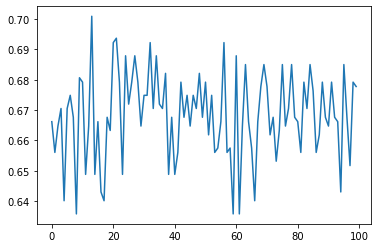

In [14]:
T1 = []
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state= 42) 
 
    clf = tree.DecisionTreeClassifier() 
    clf.fit(X_train, y_train) 

    Z = clf.predict(X_test) 
    accuracy = clf.score(X_test,y_test)
    T1.append(accuracy)
plt.plot(T1)

calcule de la variance sur 100 tirages


In [15]:
accuracy_variance = np.var(T1)
accuracy_variance

0.00019731593938988954

###### Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

On constate que la valeur de la variance est faible donc les valeurs sont proches l'un de l'autre,
avec une valeur max de 70% et une valeur min de 63% (voir figure) 

# Bagging

Les méthodes de type bagging construisent plusieurs instances d’un estimateur, calculées sur 
des échantillons aléatoires tirés de la base d’apprentissage (et éventuellement une partie des 
attributs,  également  sélectionnés  de  façon  aléatoire),  et  ensuite  combine  les  prédictions 
individuelles en réalisant leur moyenne pour réduire la variance de l’estimateur. Leur avantage 
principal réside dans le fait qu’ils construisent une version améliorée de l’algorithme de base, 
sans demander de modification de cet algorithme. Le prix à payer est un coût de calcul plus 
élevé. Comme elles réduisent le sur-apprentissage, les méthodes bagging fonctionnent très 
bien avec des prédicteurs « forts ». Par contraste, les méthodes boosting sont mieux adaptées 
à des prédicteurs faibles (weak learners). 

Dans Scikit-learn, les méthodes de bagging sont implémentées via la 
classe  BaggingClassifier  et  BaggingRegressor.  Les  constructeurs  prennent  en  paramètres  un 
estimateur de base et la stratégie de sélection des points et attributs :

- base_estimator  :  optionnel  (default=None).  Si  None  alors  l’estimateur  est  un  arbre  de décision. 
- max_samples : la taille de l’échantillon aléatoire tiré de la base d’apprentissage. 
- max_features : le nombre d’attributs tirés aléatoirement. 
- bootstrap : boolean, optionnel (default=True). Tirage des points avec remise ou non. 
- bootstrap_features : boolean, optionnel (default=False). Tirage des attributs avec remise ou non. 
- oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag).

Pour  comparer,  construisons  mainntenant  un  classifieur  bagging  sur  nos  données,  toujours 
basé sur les DecisionTreeClassifier :

In [16]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), 
max_samples=0.5, max_features=0.5, n_estimators=200) 

L’apprentissage et l’évaluation de cet ensemble se font de la façon habituelle : 

In [17]:
clf.fit(X_train, y_train) 
Z = clf.predict(X_test) 
accuracy=clf.score(X_test,y_test)

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
accuracy

0.7601156069364162

In [19]:
import warnings
warnings.filterwarnings('ignore')
T2 = []
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state= 42)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    T2.append(accuracy)


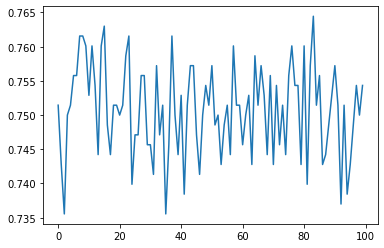

In [20]:
plt.plot(T2)

In [21]:
accuracy_variance = np.var(T2)
print(accuracy_variance)
print(max(T2),min(T2))

4.370572855758638e-05
0.7644508670520231 0.7355491329479769


#### Si on compare avec le classifieur Bagging à seul du classifieur de base, on peut dire que les valeurs sont plus regroupées avec une variance inférieur que la première en plus des meilleurs résultats sur le score avec un max de 76% et une valeur min de 73%.

In [22]:
estimators = list(range(1, 200))
accuracy = []

for n_estimators in estimators:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state= 42)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5,n_estimators=n_estimators,random_state= 0)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracy.append(acc)



##### Construire le graphique accuracy vs n_estimators. Que constatez-vous ?

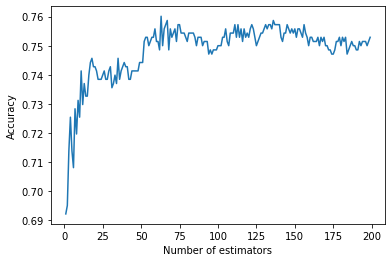

In [23]:
plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()


##### On constate sur le graphe qu'à partir de n_estimators = 75 le score d'accuracy se converge dans un intervalle entre 73-75 % donc ça ne sert à rien d'augmenter le nombre d'estimateurs, mais on peut modifier les autres paramètres du classifieur exemple: max_samples et max_features.

#### Faites  varier  les  parametres  max_samples  et  max_features.  Pour  quelles  valeurs  on  obtient  le meilleur  résultat  ?  On  pourra  notamment  utiliser  GridSearchCV  pour  réaliser  une  recherche systématique

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_samples':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
BAG = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=200)
clf = GridSearchCV(BAG, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_estimators=200),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                         0.9, 1]})

In [25]:
clf.best_params_

{'max_features': 0.7, 'max_samples': 0.3}

In [26]:
clf.best_score_

0.7891666666666667

In [27]:
clf.score(X_test, y_test)

0.7528901734104047

# Forêts aléatoires:

L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le bagging, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu.

Les deux objets Python qui implémentent les forêts aléatoires sont RandomForestClassifier et RandomForestRegressor.  
Les paramètres les plus importants sont : 
- n_estimators : integer, optional (default=10). Le nombre d’arbres. 
- max_features : le nombre d’attributs à considérer à chaque split. 
- max_samples : la taille de l’échantillon aléatoire tiré de la base d’apprentissage. 
- min_samples_leaf : le nombre minimal d’éléments dans un nœud feuille. 
- oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag). 
 
Par la suite nous allons refaire la classification sur la base diabetes en utilisant un classifieur RandomForestClassifier. Comme d’habitude, on sépare les données en gardant 10% pour l’apprentissage et 90% pour le test.

In [28]:
X, y = features, target 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.90)

In [29]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=200) 
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [30]:
y_pred = clf.predict(X_test) 
accuracy = clf.score(X_test,y_test) 
print(accuracy)

0.7052023121387283


###### Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ? 
la variable accuracy est presque identique sur les deux cas.

###### Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.  Que  pouvons-nous  conclure  en  comparant  avec  la  séction  précedente (bagging) ? 

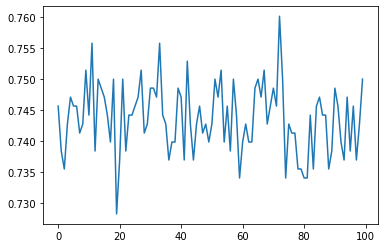

In [31]:
T3 = []
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state= 42)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    T3.append(accuracy)
plt.plot(T3)

In [32]:
accuracy_var = np.var(T3)
print(accuracy_var)
print(max(T3),min(T3))

3.059971098265898e-05
0.7601156069364162 0.7283236994219653


Si on compare avec le classifieur Bagging , on peut dire que les valeurs sont plus regroupées avec une variance inférieur et un score max de 75% et une valeur min de 72%

##### Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

In [33]:
estimators = list(range(1, 200))
accuracy = []

for n_estimators in estimators:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state= 42)
    clf = RandomForestClassifier(n_estimators=n_estimators,random_state= 0)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracy.append(acc)

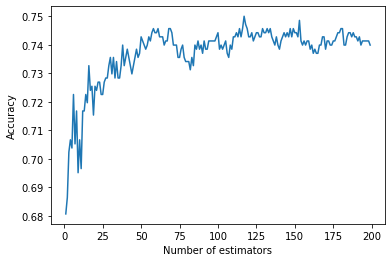

In [34]:
plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

On constat que appartire de 50 estimateurs la variable accuracy se converge donc le classifieur RandomForest se converge plus vite que le bagging.

###### Regardez dans la documentation les ExtraTreesClassifier et refaites la classification avec ce type de classifieur. Comparez avec RandomForestClassifier. 

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
estimators = list(range(1, 200))
accuracy = []

for n_estimators in estimators:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state= 42)
    clf = ExtraTreesClassifier(n_estimators=n_estimators,random_state= 0)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracy.append(acc)

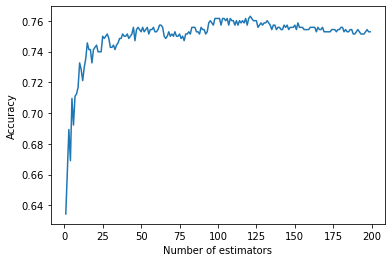

In [37]:
plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

On constat que appartire de 25 estimateurs la variable accuracy se converge donc le classifieur ExtraTreesClassifier se converge plus vite que le RandomForestClassifier.

# Boosting

Le principe du boosting est d’évaluer une séquence de classifieurs faibles (weak learners) sur plusieurs versions légèrement modifiées des données d’apprentissage. Les décisions obtenues sont alors combinées par une somme pondérée pour obtenir le modèle final.

Avec  scikit-learn,  c’est  la  classe  AdaBoostClassifier  qui  implémente  cet  algorithme.  Les 
paramètres les plus importants sont : 
- n_estimators : integer, optional (default=10). Le nombre de classifieurs faibles. 
- learning_rate : contrôle la vitesse de changement des poids par itération. 
- base_estimator : (default=DecisionTreeClassifier) le classifieur faible utilisé. 
 
Dans la suite nous allons refaire la classification sur la base Diabetes en utilisant un classifieur RandomForestClassifier :

In [38]:
from sklearn.ensemble import AdaBoostClassifier
X, y = features, target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state= 42) 
 
# AdaBoost basé sur 200 arbres de décision 
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2) 
clf.fit(X_train, y_train) 
accuracy = clf.score(X_test, y_test) 
print(accuracy)

0.7355491329479769


# Question : 
Le paramètre max_depth contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir 
l’impact  de  l’utilisation  d’un  classifieur  faible  vs  plus  fort  (max_depth  élevé  ou  éliminer  le 
paramètre). Testez aussi l’effet du paramètre learning_rate et le nombre de classifieurs.

In [39]:
max_depth_tab= [1,5,10,20]
n_estimators_tab= [20,50,100,200]
learning_rate_tab = [1, 2, 3, 4]
for i in max_depth_tab:
    for j in n_estimators_tab:
        for k in learning_rate_tab:
            clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i), n_estimators=j, learning_rate=k) 
            clf.fit(X_train, y_train) 
            accuracy = clf.score(X_test, y_test) 
            print('max_depth: ',i,' ;n_estimators:',j,' ;learning_rate:',k,'   ;acc=',accuracy)


max_depth:  1  ;n_estimators: 20  ;learning_rate: 1    ;acc= 0.7427745664739884
max_depth:  1  ;n_estimators: 20  ;learning_rate: 2    ;acc= 0.7225433526011561
max_depth:  1  ;n_estimators: 20  ;learning_rate: 3    ;acc= 0.5346820809248555
max_depth:  1  ;n_estimators: 20  ;learning_rate: 4    ;acc= 0.5361271676300579
max_depth:  1  ;n_estimators: 50  ;learning_rate: 1    ;acc= 0.7341040462427746
max_depth:  1  ;n_estimators: 50  ;learning_rate: 2    ;acc= 0.7225433526011561
max_depth:  1  ;n_estimators: 50  ;learning_rate: 3    ;acc= 0.5346820809248555
max_depth:  1  ;n_estimators: 50  ;learning_rate: 4    ;acc= 0.5361271676300579
max_depth:  1  ;n_estimators: 100  ;learning_rate: 1    ;acc= 0.7283236994219653
max_depth:  1  ;n_estimators: 100  ;learning_rate: 2    ;acc= 0.7225433526011561
max_depth:  1  ;n_estimators: 100  ;learning_rate: 3    ;acc= 0.5346820809248555
max_depth:  1  ;n_estimators: 100  ;learning_rate: 4    ;acc= 0.5361271676300579
max_depth:  1  ;n_estimators: 200  ;

# TP 5

# SVM linéaires

Les  machines  à  vecteurs  de  support  (SVM  :  Support  Vector  Machines)  sont  une  classe  de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation  des  classes).  Il  existe  plusieurs  formulations  (linéaires,  versions  à  noyaux)  qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables. 
 
#### Les avantages des SVM : 
- Très efficaces en dimension élevée. 
- Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le nombre d’échantillons d’apprentissage. 
- Pour la décision, n’utilisent pas tous les échantillons d’apprentissage, mais seulement une  partie  (les  vecteurs  de  support).  En  conséquence,  ces  algorithmes  demandent moins de mémoire. 

#### Désavantages : 
- Si  le  nombre  d’attributs  est  beaucoup  plus  grand  que  le  nombre  d’échantillons,  les performances sont moins bonnes. 
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités

### Dans ce TP nous allons utiliser le jeu de données diabetes déjà rencontré dans les séances précédentes

In [93]:
features = pd.DataFrame(df, columns = ['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age'])

In [51]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [139]:
target = pd.DataFrame(df, columns =['Outcome'])

In [140]:
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


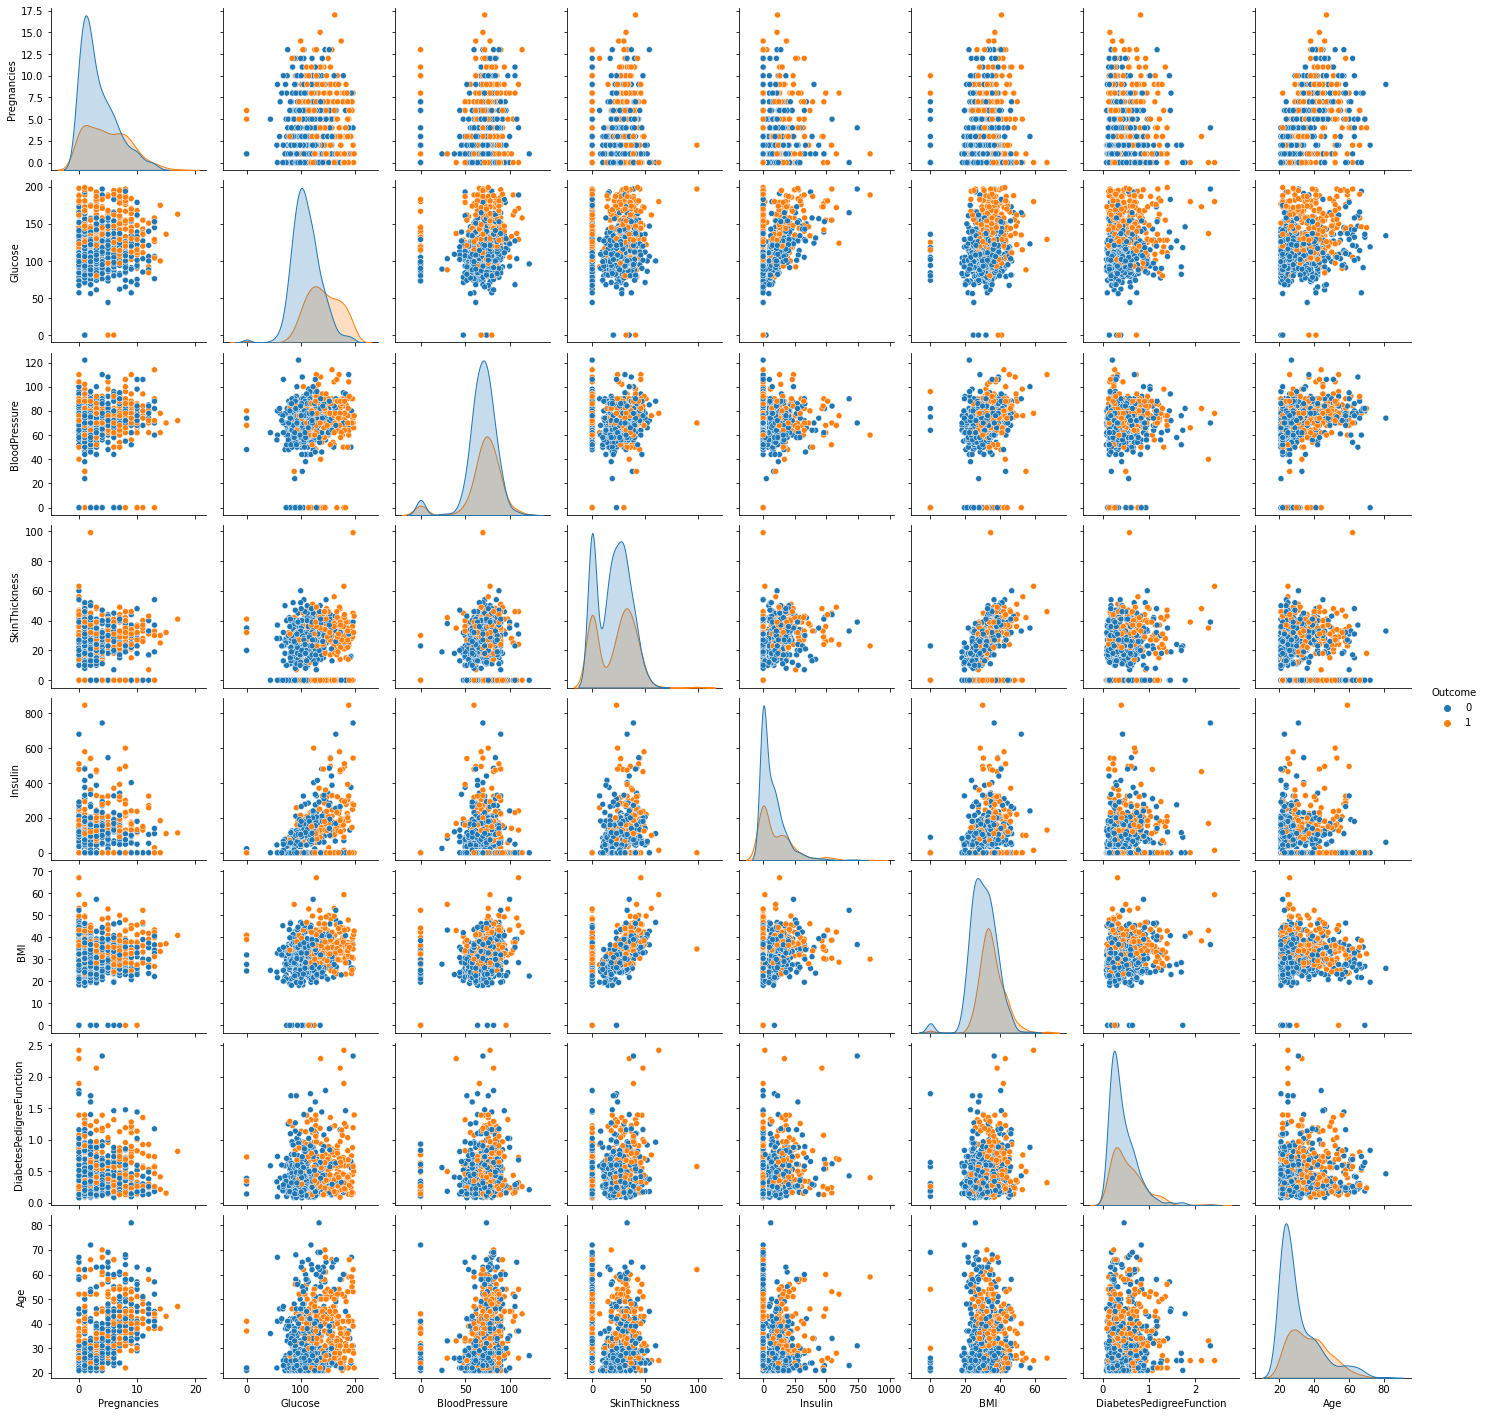

In [141]:
sns.pairplot(df,hue="Outcome")

In [142]:
X = features.iloc[:,:].values


In [143]:
y = target.iloc[:,-1].values

In [144]:
from sklearn import svm
# On conserve 50% du jeu de données pour l'évaluation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [145]:
C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train) 

LinearSVC()

Calculez le score d’échantillons bien classifiés sur le jeu de données de test. 

In [146]:
lin_svc.score(X_test,y_test)

0.6744791666666666

pour l'affichage on a choisi le deux atrubit glucose et age:

# standarsisation

In [147]:
features = pd.DataFrame(df, columns = ['Glucose' , 'Age'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard= scaler.fit_transform(features)

X = x_standard
y = target.iloc[:,-1].values

In [148]:
# On conserve 50% du jeu de données pour l'évaluation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train) 
lin_svc.score(X_test,y_test)

0.7317708333333334

Text(0.5, 1.0, 'LinearSVC')

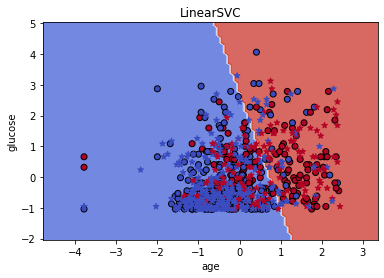

In [149]:
# Créer la surface de décision discretisée 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h 
h = max((x_max - x_min) / 100, (y_max - y_min) / 100) 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
# Surface de décision 
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
# Afficher aussi les points d'apprentissage 
plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm) 
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm) 
plt.xlabel('age') 
plt.ylabel('glucose') 
plt.title("LinearSVC") 

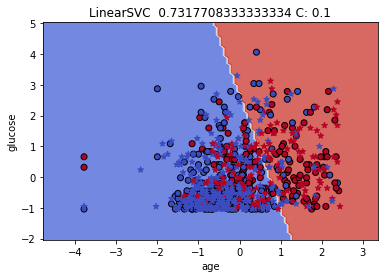

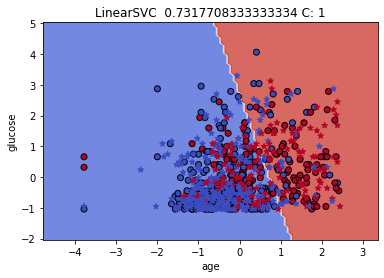

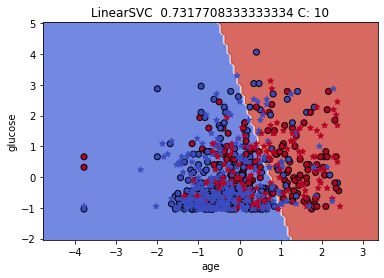

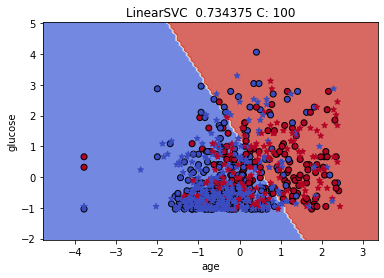

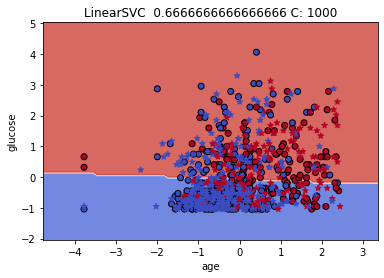

In [128]:
C = [0.1, 1, 10, 100, 1000]
for i in C:
    lin_svc = svm.LinearSVC(C=i) 
    lin_svc.fit(X_train, y_train)
    R = lin_svc.score(X_test,y_test)
    # Créer la surface de décision discretisée 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h 
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100) 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

    # Surface de décision 
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
    # Afficher aussi les points d'apprentissage 
    plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k', 
    c=y_train, cmap=plt.cm.coolwarm) 
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
    cmap=plt.cm.coolwarm) 
    plt.xlabel('age') 
    plt.ylabel('glucose') 
    plt.title("LinearSVC  "+ str(R) + ' C: '+ str(i) )
    
    

# Question 
D’après  la  visualisation  ci-dessus,  ce  modèle  vous  paraît-il  adapté  au 
problème ? Si non, que peut-on faire pour l’améliorer ? 

D'apres la vusiausation, le model svm n'est pas adapté au probleme pour l'amiliorer on doit modifier de linear en polynomial ou rbf.

In [152]:
# SVM Kernels
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    print(k)
    print(model.score(X_test,y_test))

linear
0.7317708333333334
poly
0.7005208333333334
rbf
0.7526041666666666
sigmoid
0.6640625


Les modèles linéaires LinearSVC() et SVC(kernel='linear'), comme nous l’avons 
déjà dit, produisent des résultats légèrement différents à cause du fait qu’ils 
optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils 
gèrent les problèmes multi-classe de manière différente (linearSVC 
utilise One-vs-All et SVC utilise One-vs-One). 

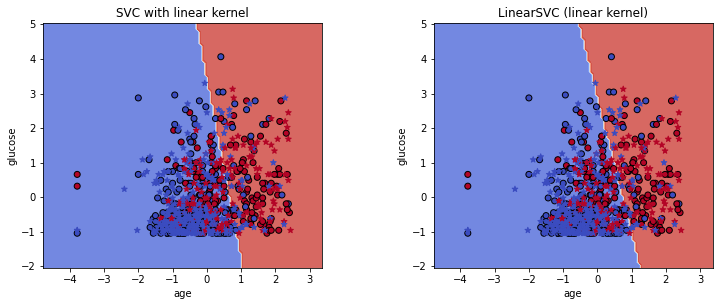

In [132]:
C=10
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train) 
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train) 
 
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)'] 
 
fig = plt.figure(figsize=(12, 4.5)) 
 
for i, clf in enumerate((svc, lin_svc)): 
    plt.subplot(1, 2, i + 1) 
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # Utiliser une palette de couleurs 
    Z = Z.reshape(xx.shape) 
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
    # Afficher aussi les points d'apprentissage 
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm) 
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', 
c=y_test, cmap=plt.cm.coolwarm) 
    plt.xlabel('age') 
    plt.ylabel('glucose') 
    plt.title(titles[i]) 
plt.show() 

Pour l’instant, nous n’avons exploité que deux variables explicatives. 
Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est 
souvent plus facile de trouver des hyperplans séparateurs dans des espaces 
de grande dimension.

# Question 
Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les attributs  du  jeu  de  données  diabetes.

Le score  de classification en test a-t-il augmenté ? Pourquoi ?

In [154]:
features = pd.DataFrame(df, columns = ['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age'])
scaler = StandardScaler()
x_standard= scaler.fit_transform(features)

X = x_standard
y = target.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)

C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train) 
lin_svc.score(X_test,y_test)


0.7864583333333334

oui le score a augmenté car on a ogmenter le nombre d'attribut se qui a permet a la model de bien separer les classes.


# conclusion :

- nous avons appris à utiliser les SVM de Sci-kit Learn pour créer un modèle.
- Accuracy n'est pas une bonne mesure pour évaluer un ensemble de données avec des classes asymétriques. C'est un ensemble de données avec des classes déséquilibrées, où il y a plus d'échantillons d'une classe que de l'autre.